In [2]:
#libraries that we used it in the priject
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

In [3]:
#display the data

fileName = "dataset_TMK-6.csv"

df = pd.read_csv(fileName)

display(df.head())
display(df.info())
display(df.describe())

#some important codes to solve the question in the report

print(df['Attack_Type'].unique())

label_counts = df['Attack_Type'].value_counts()
label_percentages = (label_counts / len(df)) * 100

print(label_percentages)

Timestamp    Source_IP Destination_IP Protocol  Packet_Length  \
0  2024-10-23 12:00:00  192.168.0.1    192.168.0.1     ICMP           1155   
1  2024-10-23 12:00:01  192.168.0.7     172.16.0.5     ICMP           1776   
2  2024-10-23 12:00:02  192.168.0.7       10.0.0.3      UDP            627   
3  2024-10-23 12:00:03  192.168.0.7       10.0.0.3      UDP           1754   
4  2024-10-23 12:00:04  192.168.0.1       10.0.0.4      UDP           1326   

   Duration  Source_Port  Destination_Port  Bytes_Sent  Bytes_Received  ...  \
0      4.01           53                53         675             877  ...   
1      3.75           22                22         297            1062  ...   
2      4.24           80              8080         122             723  ...   
3      3.09          443               443        1626            1703  ...   
4      2.52           80               443        1851             771  ...   

  Avg_Packet_Size  Total_Fwd_Packets  Total_Bwd_Packets  Fwd_Header_Length  \
0             512                 21                 34                256   
1            1024                 14                 19                512   
2             512                 10                 41                512   
3             256                 37                 44                128   
4            1024                 40                 16                512   

   Bwd_Header_Length  Sub_Flow_Fwd_Bytes  Sub_Flow_Bwd_Bytes  Inbound  \
0                256                 697                1028        1   
1                256                 513                1300        1   
2                256                 250                 497        0   
3                256                 985                1471        0   
4                256                1877                 595        1   

   Attack_Type  Label  
0         DDoS      1  
1         DDoS      1  
2         DDoS      1  
3   Ransomware      0  
4       Normal      1  

[5 rows x 23 columns]

<class 'pandas.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           1430 non-null   str    
 1   Source_IP           1430 non-null   str    
 2   Destination_IP      1430 non-null   str    
 3   Protocol            1430 non-null   str    
 4   Packet_Length       1430 non-null   int64  
 5   Duration            1430 non-null   float64
 6   Source_Port         1430 non-null   int64  
 7   Destination_Port    1430 non-null   int64  
 8   Bytes_Sent          1430 non-null   int64  
 9   Bytes_Received      1430 non-null   int64  
 10  Flags               1430 non-null   str    
 11  Flow_Packets/s      1430 non-null   float64
 12  Flow_Bytes/s        1430 non-null   float64
 13  Avg_Packet_Size     1430 non-null   int64  
 14  Total_Fwd_Packets   1430 non-null   int64  
 15  Total_Bwd_Packets   1430 non-null   int64  
 16  Fwd_Header_Length

None

Packet_Length     Duration  Source_Port  Destination_Port   Bytes_Sent  \
count    1430.000000  1430.000000  1430.000000       1430.000000  1430.000000   
mean     1064.520280     2.586084  1673.184615       1848.512587  1015.900000   
std       572.437816     1.420248  3124.172914       3275.839849   569.400101   
min        64.000000     0.100000    22.000000         22.000000    65.000000   
25%       562.000000     1.360000    53.000000         53.000000   503.000000   
50%      1066.000000     2.605000    80.000000         80.000000  1019.000000   
75%      1539.000000     3.840000   443.000000        443.000000  1497.000000   
max      2046.000000     5.000000  8080.000000       8080.000000  2045.000000   

       Bytes_Received  Flow_Packets/s  Flow_Bytes/s  Avg_Packet_Size  \
count     1430.000000     1430.000000   1430.000000      1430.000000   
mean      1045.531469       24.793007   1070.640140       460.128671   
std        572.170268        8.772747    562.422385       360.760328   
min         64.000000       10.000000    100.200000        64.000000   
25%        521.000000       17.200000    586.175000       256.000000   
50%       1045.000000       24.900000   1072.050000       256.000000   
75%       1538.500000       32.100000   1559.300000      1024.000000   
max       2044.000000       40.000000   2047.900000      1024.000000   

       Total_Fwd_Packets  Total_Bwd_Packets  Fwd_Header_Length  \
count        1430.000000        1430.000000        1430.000000   
mean           29.279021          29.665734         306.483916   
std            11.530216          11.224480         159.092478   
min            10.000000          10.000000         128.000000   
25%            19.000000          20.000000         128.000000   
50%            29.000000          30.000000         256.000000   
75%            39.000000          39.000000         512.000000   
max            49.000000          49.000000         512.000000   

       Bwd_Header_Length  Sub_Flow_Fwd_Bytes  Sub_Flow_Bwd_Bytes      Inbound  \
count        1430.000000         1430.000000         1430.000000  1430.000000   
mean          295.742657         1074.735664         1064.494406     0.524476   
std           160.405437          565.793704          542.027082     0.499575   
min           128.000000          130.000000          128.000000     0.000000   
25%           128.000000          583.500000          601.500000     0.000000   
50%           256.000000         1083.000000         1042.000000     1.000000   
75%           512.000000         1564.000000         1527.000000     1.000000   
max           512.000000         2047.000000         2045.000000     1.000000   

             Label  
count  1430.000000  
mean      0.488112  
std       0.500034  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

<StringArray>
['DDoS', 'Ransomware', 'Normal', 'Brute Force']
Length: 4, dtype: str
Attack_Type
DDoS           26.363636
Ransomware     25.244755
Brute Force    24.615385
Normal         23.776224
Name: count, dtype: float64


In [4]:
data_columns = ['Protocol' , 'Packet_Length' , 'Duration','Source_Port', 'Destination_Port' , 'Bytes_Sent' , 'Bytes_Received' , 'Flags' , 'Flow_Packets/s', 'Flow_Bytes/s' ]
labels = 'Attack_Type'
#data_columns.remove('Label')
#data_columns.remove('Attack_Type')
#data_columns.remove('Inbound')

label1 = 'Label'
label2 = 'Attack_Type'
label3 = 'Inbound'

print('featurs:',data_columns ,'\n \n labels: ', labels)

featurs: ['Protocol', 'Packet_Length', 'Duration', 'Source_Port', 'Destination_Port', 'Bytes_Sent', 'Bytes_Received', 'Flags', 'Flow_Packets/s', 'Flow_Bytes/s'] 
 
 labels:  Attack_Type


In [5]:
# determining missing values

missing_columns = df[data_columns].isnull().any()
missing_columns = missing_columns[missing_columns].index.tolist()

if missing_columns:
    for col in missing_columns:
        df[col].fillna(df[col].mean(), inplace = True)
#-------------------------------------------------------------------------------------------
missing_label = df[labels].isnull().any()

if missing_label :
    df[labels].fillna(df[labels].mean(), inplace = True)

display(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           1430 non-null   str    
 1   Source_IP           1430 non-null   str    
 2   Destination_IP      1430 non-null   str    
 3   Protocol            1430 non-null   str    
 4   Packet_Length       1430 non-null   int64  
 5   Duration            1430 non-null   float64
 6   Source_Port         1430 non-null   int64  
 7   Destination_Port    1430 non-null   int64  
 8   Bytes_Sent          1430 non-null   int64  
 9   Bytes_Received      1430 non-null   int64  
 10  Flags               1430 non-null   str    
 11  Flow_Packets/s      1430 non-null   float64
 12  Flow_Bytes/s        1430 non-null   float64
 13  Avg_Packet_Size     1430 non-null   int64  
 14  Total_Fwd_Packets   1430 non-null   int64  
 15  Total_Bwd_Packets   1430 non-null   int64  
 16  Fwd_Header_Length

None

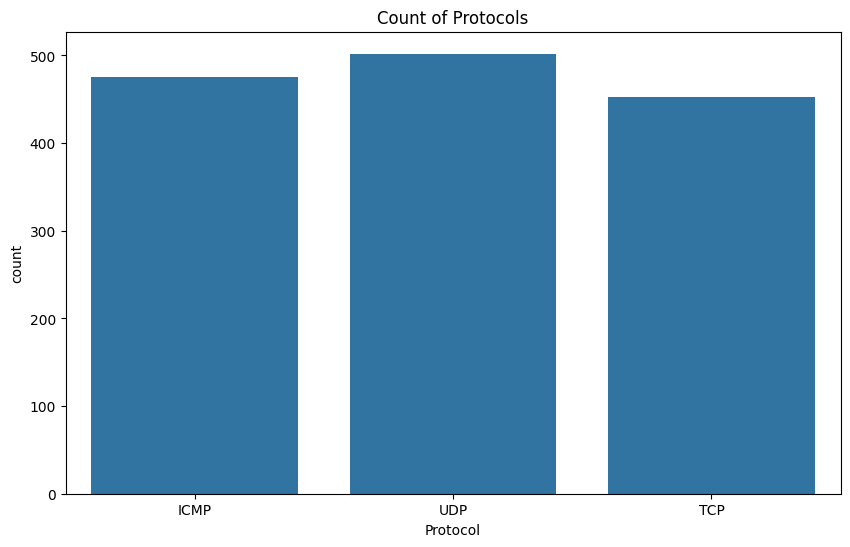

In [6]:
# Data visualization:

plt.figure(figsize=(10, 6))
sns.countplot(x='Protocol', data=df)
plt.title('Count of Protocols')
plt.show()

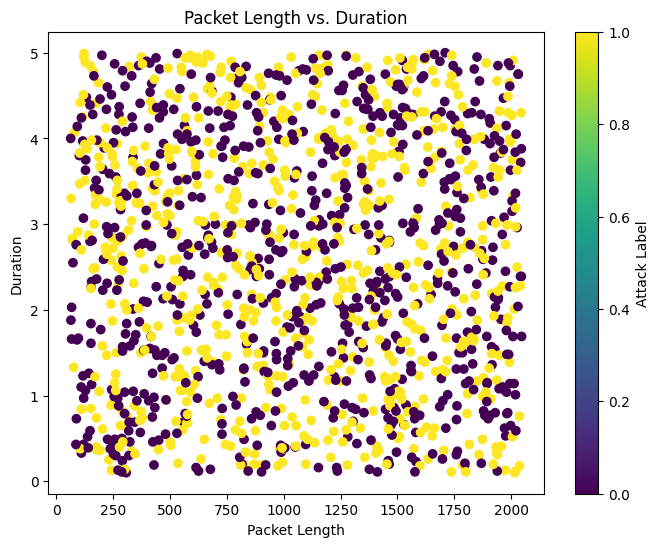

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Packet_Length'], df['Duration'], c=df['Label'], cmap='viridis')
plt.title('Packet Length vs. Duration')
plt.xlabel('Packet Length')
plt.ylabel('Duration')
plt.colorbar(label='Attack Label')
plt.show()

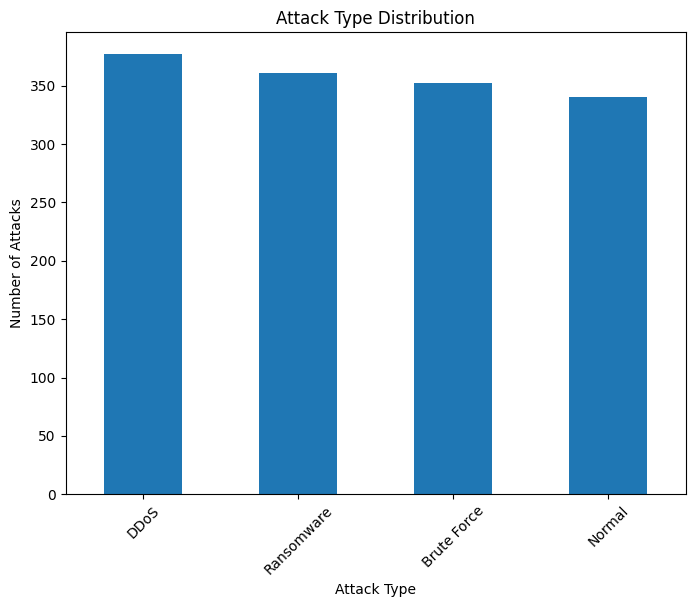

In [8]:
plt.figure(figsize=(8, 6))
df['Attack_Type'].value_counts().plot(kind='bar')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

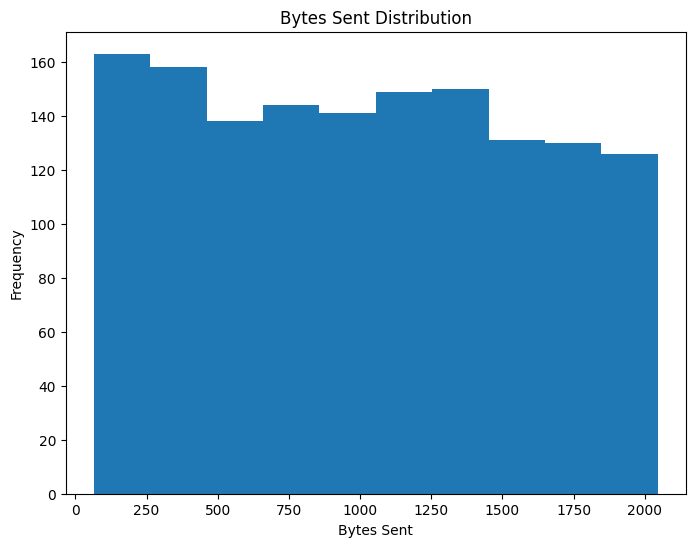

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['Bytes_Sent'], bins=10)
plt.title('Bytes Sent Distribution')
plt.xlabel('Bytes Sent')
plt.ylabel('Frequency')
plt.show()

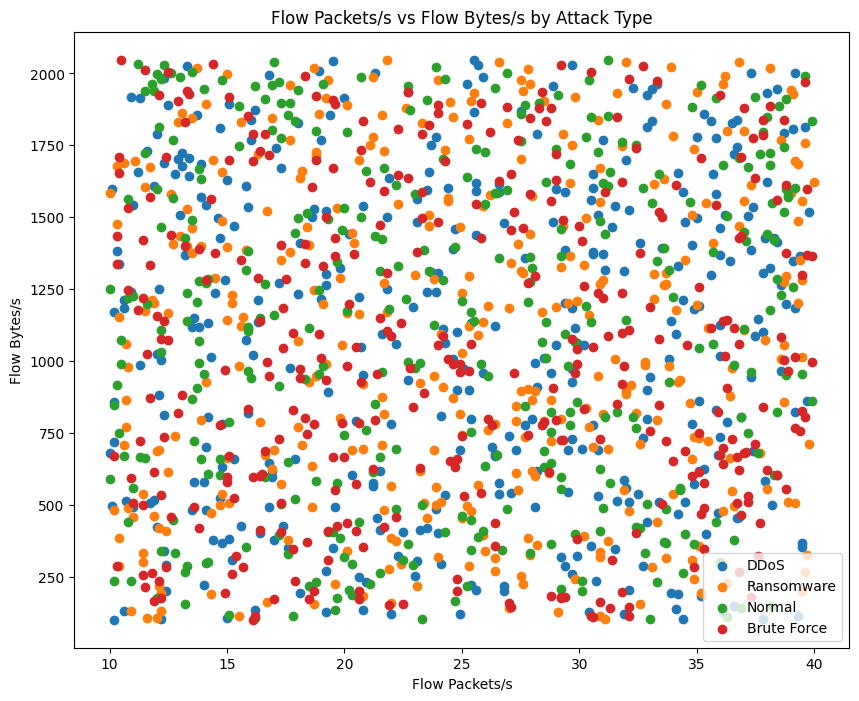

In [10]:
plt.figure(figsize=(10, 8))
for attack_type in df['Attack_Type'].unique():
    subset = df[df['Attack_Type'] == attack_type]
    plt.scatter(subset['Flow_Packets/s'], subset['Flow_Bytes/s'], label=attack_type)
plt.xlabel('Flow Packets/s')
plt.ylabel('Flow Bytes/s')
plt.title('Flow Packets/s vs Flow Bytes/s by Attack Type')
plt.legend()
plt.show()

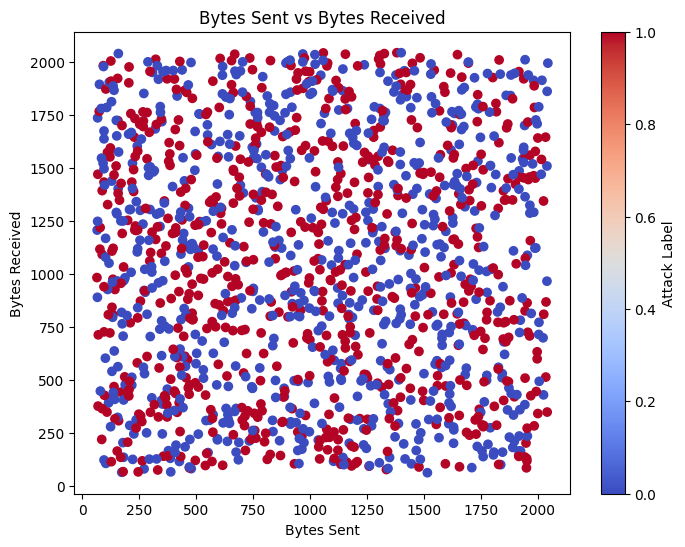

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Bytes_Sent'], df['Bytes_Received'], c=df['Label'], cmap='coolwarm')
plt.title('Bytes Sent vs Bytes Received')
plt.xlabel('Bytes Sent')
plt.ylabel('Bytes Received')
plt.colorbar(label='Attack Label')
plt.show()

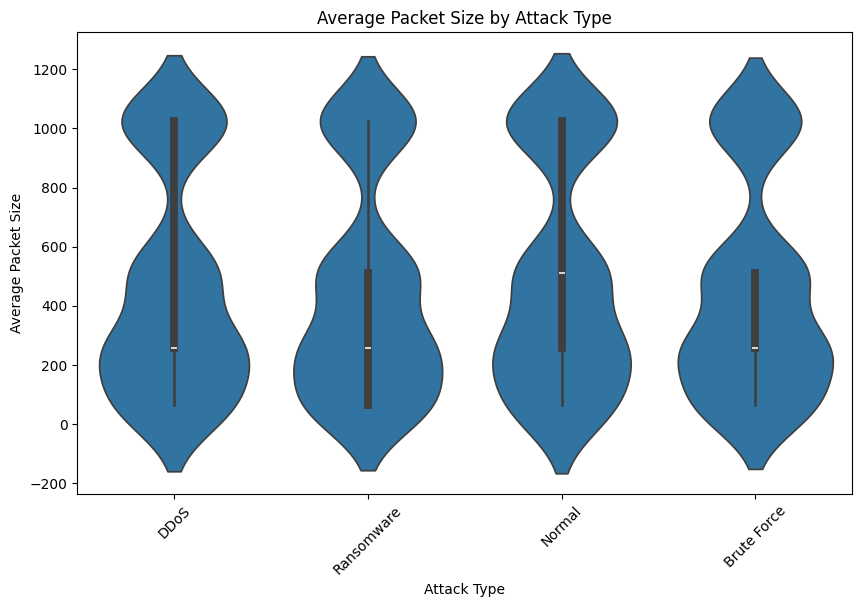

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Attack_Type', y='Avg_Packet_Size', data=df)
plt.title('Average Packet Size by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Average Packet Size')
plt.xticks(rotation=45)
plt.show()

In [13]:
# encoding

cat_columns = df[data_columns].select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])

df[labels] = label_encoder.fit_transform(df[labels])

display(df.head())
display(df.info())

C:\Users\yazed\AppData\Local\Temp\ipykernel_2304\676127539.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_columns = df[data_columns].select_dtypes(include=['object']).columns.tolist()


Timestamp    Source_IP Destination_IP  Protocol  Packet_Length  \
0  2024-10-23 12:00:00  192.168.0.1    192.168.0.1         0           1155   
1  2024-10-23 12:00:01  192.168.0.7     172.16.0.5         0           1776   
2  2024-10-23 12:00:02  192.168.0.7       10.0.0.3         2            627   
3  2024-10-23 12:00:03  192.168.0.7       10.0.0.3         2           1754   
4  2024-10-23 12:00:04  192.168.0.1       10.0.0.4         2           1326   

   Duration  Source_Port  Destination_Port  Bytes_Sent  Bytes_Received  ...  \
0      4.01           53                53         675             877  ...   
1      3.75           22                22         297            1062  ...   
2      4.24           80              8080         122             723  ...   
3      3.09          443               443        1626            1703  ...   
4      2.52           80               443        1851             771  ...   

   Avg_Packet_Size  Total_Fwd_Packets  Total_Bwd_Packets  Fwd_Header_Length  \
0              512                 21                 34                256   
1             1024                 14                 19                512   
2              512                 10                 41                512   
3              256                 37                 44                128   
4             1024                 40                 16                512   

   Bwd_Header_Length  Sub_Flow_Fwd_Bytes  Sub_Flow_Bwd_Bytes  Inbound  \
0                256                 697                1028        1   
1                256                 513                1300        1   
2                256                 250                 497        0   
3                256                 985                1471        0   
4                256                1877                 595        1   

   Attack_Type  Label  
0            1      1  
1            1      1  
2            1      1  
3            3      0  
4            2      1  

[5 rows x 23 columns]

<class 'pandas.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           1430 non-null   str    
 1   Source_IP           1430 non-null   str    
 2   Destination_IP      1430 non-null   str    
 3   Protocol            1430 non-null   int64  
 4   Packet_Length       1430 non-null   int64  
 5   Duration            1430 non-null   float64
 6   Source_Port         1430 non-null   int64  
 7   Destination_Port    1430 non-null   int64  
 8   Bytes_Sent          1430 non-null   int64  
 9   Bytes_Received      1430 non-null   int64  
 10  Flags               1430 non-null   int64  
 11  Flow_Packets/s      1430 non-null   float64
 12  Flow_Bytes/s        1430 non-null   float64
 13  Avg_Packet_Size     1430 non-null   int64  
 14  Total_Fwd_Packets   1430 non-null   int64  
 15  Total_Bwd_Packets   1430 non-null   int64  
 16  Fwd_Header_Length

None

In [14]:
#splitting

X = df[data_columns].values
Y = df[labels].values

In [15]:
#normalizing

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

#splitting to train & test

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size = 0.3, random_state = 42)

In [16]:
#k-nn algorithm

k = 5  
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, Y_train)


Y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

print("\nAccuracy Score:")
print(accuracy_score(Y_test, Y_pred))

Confusion Matrix:
[[29 32 19 32]
 [31 32 27 17]
 [23 37 23 15]
 [30 38 21 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.26      0.26       112
           1       0.23      0.30      0.26       107
           2       0.26      0.23      0.24        98
           3       0.26      0.21      0.23       112

    accuracy                           0.25       429
   macro avg       0.25      0.25      0.25       429
weighted avg       0.25      0.25      0.25       429


Accuracy Score:
0.2494172494172494


In [17]:
# SVM MODEL

svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, Y_train)   #train the SVM model
Y_pred_svm = svm_model.predict(X_test)

In [18]:
# train SVM with hard margin

svm_hard = SVC(kernel = 'linear' , C = 30)
svm_hard.fit(X_train, Y_train)
hard_sv = svm_hard.support_



# train SVM with soft margin
svm_soft = SVC(kernel = 'linear', C = 1.0)
svm_soft.fit(X_train, Y_train)
soft_sv = svm_soft.support_

# compare both type of sv

display(len(hard_sv) , len(soft_sv))

997

997

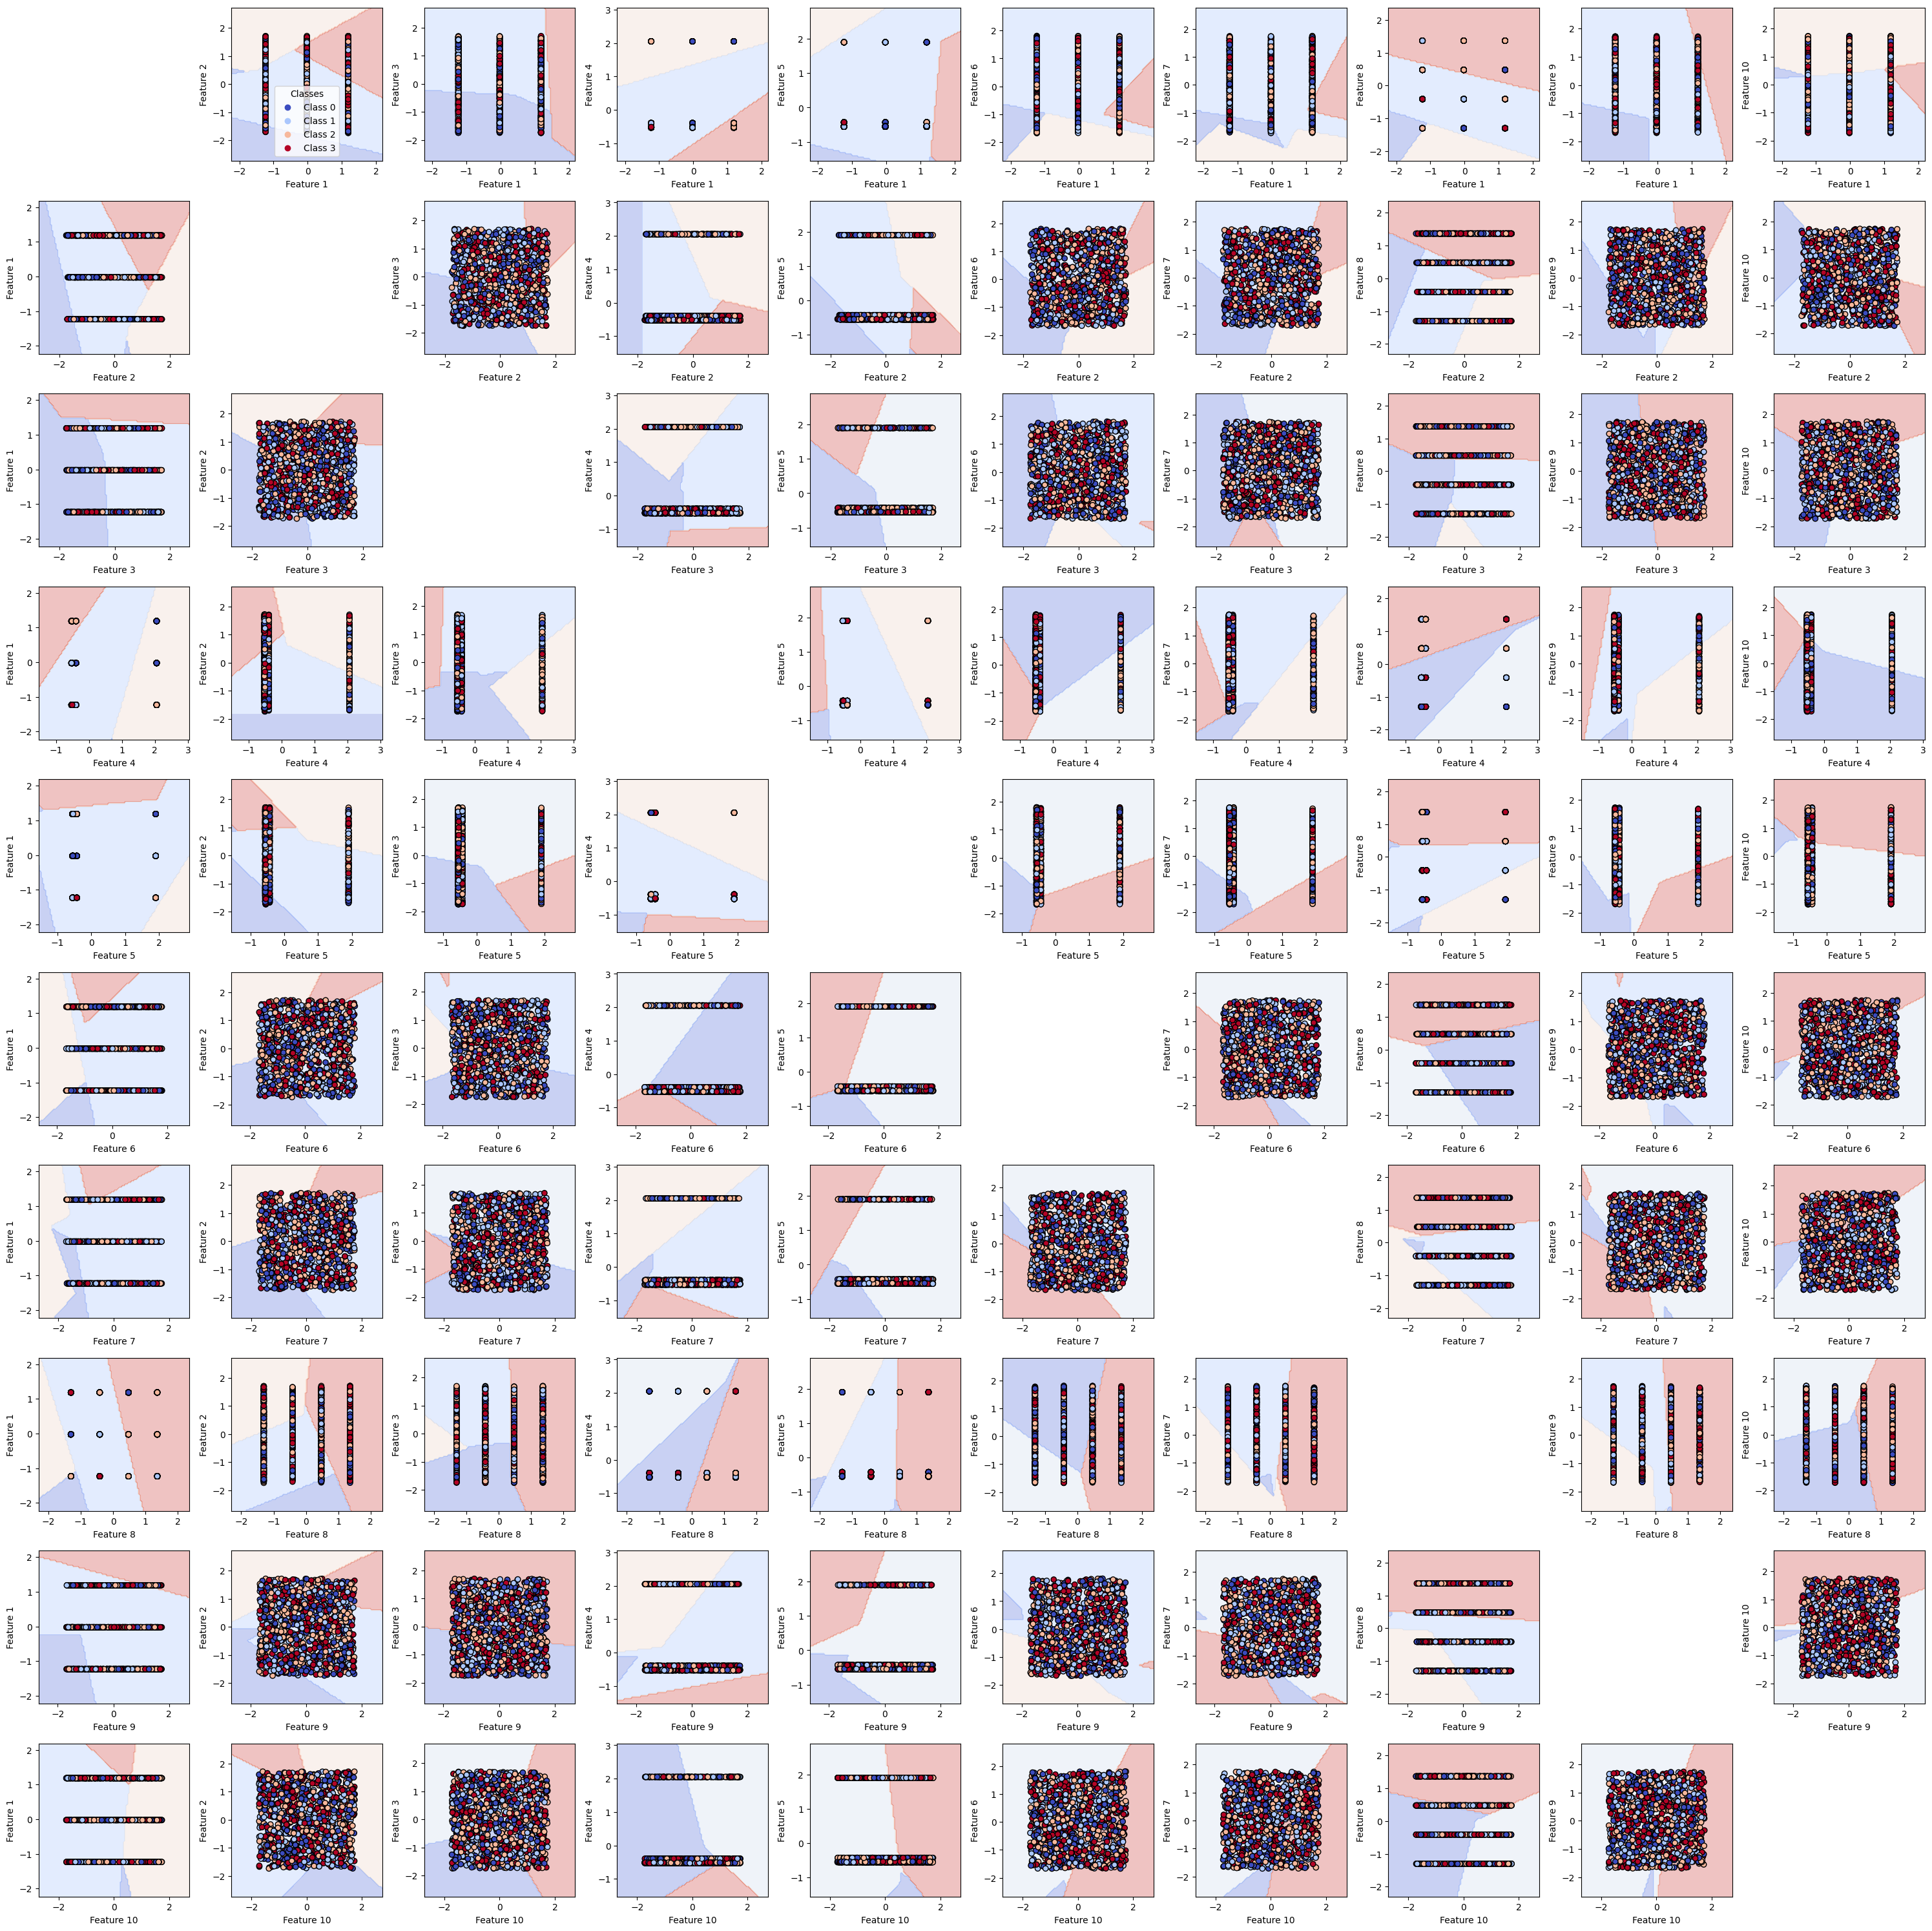

In [19]:
def plot_svm(X, Y, model, features=None):
    n_features = X.shape[1]
    
    # Create a subplot grid for feature pairs
    fig, axes = plt.subplots(n_features, n_features, figsize=(3 * n_features, 3 * n_features))
    
    if features is None:
        features = [f"Feature {i+1}" for i in range(n_features)]
    
    for i in range(n_features):
        for j in range(n_features):
            ax = axes[i, j]

            # Turn off diagonal plots (i == j)
            if i == j:
                ax.axis('off')
                continue

            # Prepare data for the selected feature pair
            x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
            y_min, y_max = X[:, j].min() - 1, X[:, j].max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                                 np.linspace(y_min, y_max, 100))

            # Create a grid of points with mean values for all features
            X_grid = np.tile(X.mean(axis=0), (xx.size, 1))
            X_grid[:, i] = xx.ravel()
            X_grid[:, j] = yy.ravel()

            # Predict class labels over the grid
            Z = model.predict(X_grid).reshape(xx.shape)

            # Plot decision boundary
            ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
            scatter = ax.scatter(X[:, i], X[:, j], c=Y, edgecolors='k', cmap='coolwarm')

            ax.set_xlabel(features[i])
            ax.set_ylabel(features[j])

            # Add class legend (only once per subplot)
            if i == 0 and j == 1:  # arbitrary position to add legend once
                handles, labels = scatter.legend_elements()
                ax.legend(handles, [f"Class {label}" for label in np.unique(Y)], title="Classes")

    plt.tight_layout()
    plt.show()

plot_svm(X_train, Y_train , svm_hard)

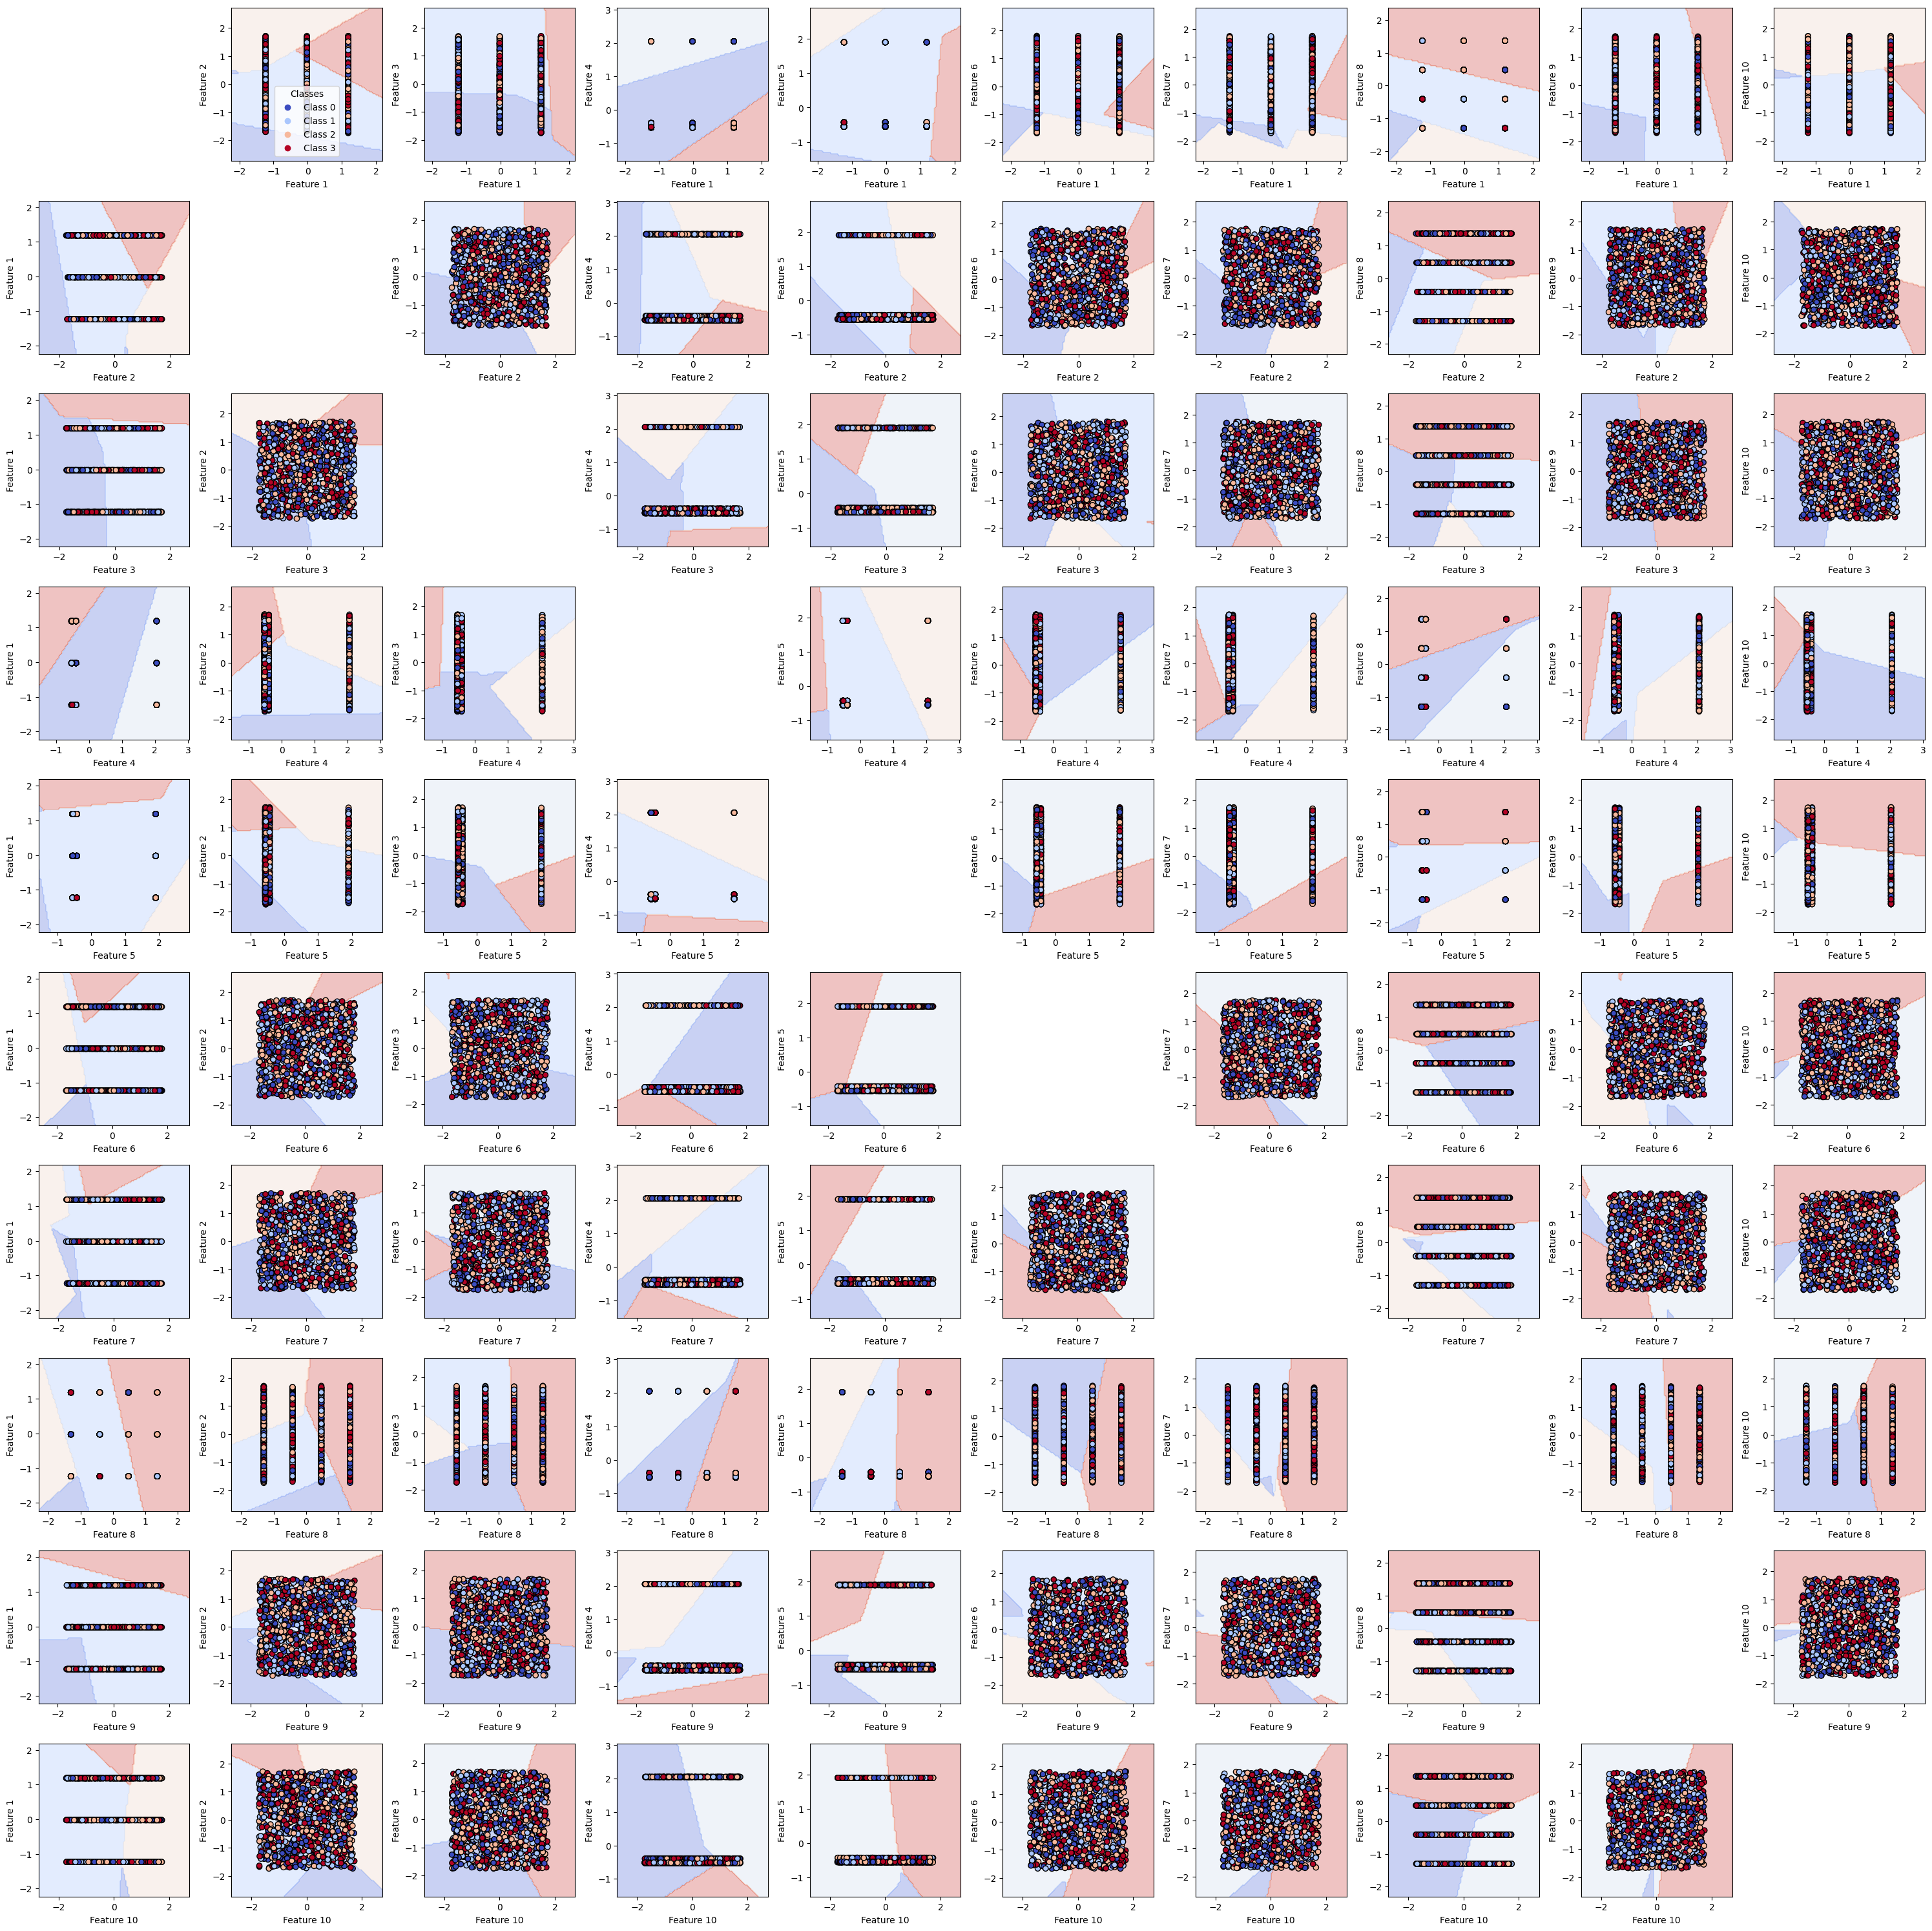

In [20]:
plot_svm(X_train, Y_train , svm_soft)

In [21]:
#kernel Function

XY = pd.DataFrame(X_scaled)  # Combine X and y for resampling
XY['Label'] = Y  

# take a sample

sampleData = resample(XY , n_samples = 1000 , random_state = 42)

XSample = sampleData.drop(columns = ['Label'])
YSample = sampleData['Label']


# try different kernels with cross-val

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernels_output = {}

for kernel in kernels:
    model = SVC(kernel = kernel)
    output = scores = cross_val_score(model, XSample, YSample, cv=5, scoring='accuracy') 
    kernels_output[kernel] = (np.mean(output), np.std(output))

kernels_output

{'linear': (np.float64(0.273), np.float64(0.018330302779823362)),
 'poly': (np.float64(0.37), np.float64(0.028106938645110397)),
 'rbf': (np.float64(0.35200000000000004), np.float64(0.03264965543462903)),
 'sigmoid': (np.float64(0.225), np.float64(0.03301514803843836))}

In [22]:
# we will use RBF kernal because it works well with Most real-world problems (it's often the most powerful for real-world, non-linear data)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, Y_train)
yPred_rbf = svm_rbf.predict(X_test)

accuracy_rbf = accuracy_score(Y_test, yPred_rbf)
report_rbf = classification_report(Y_test, yPred_rbf, output_dict=True)
pd.DataFrame(report_rbf).transpose()

precision    recall  f1-score    support
0              0.263158  0.133929  0.177515  112.00000
1              0.206667  0.289720  0.241245  107.00000
2              0.177570  0.193878  0.185366   98.00000
3              0.217391  0.223214  0.220264  112.00000
accuracy       0.209790  0.209790  0.209790    0.20979
macro avg      0.216196  0.210185  0.206098  429.00000
weighted avg   0.217568  0.209790  0.206364  429.00000

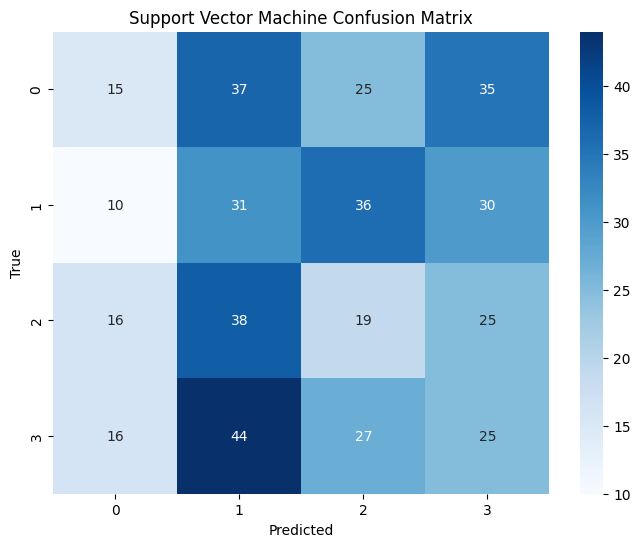

(0.2097902097902098, 0.21619648980231967, 0.2101850085828724)

In [23]:
#model preformance

#confusion matrix and metrics:
cm = confusion_matrix(Y_test, yPred_rbf, labels=svm_model.classes_)
accuracy_svm = accuracy_score(Y_test, yPred_rbf)
precision_svm = precision_score(Y_test, yPred_rbf, average='macro')
recall_svm = recall_score(Y_test, yPred_rbf, average='macro')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

accuracy_svm, precision_svm, recall_svm

In [24]:
# cross validaation

cv_model = SVC(kernel = 'linear')

cv_score = cross_val_score(cv_model, X_scaled, Y , cv = 5 , scoring = 'accuracy')
cv_mean = np.mean(cv_score)
cv_std = np.std(cv_score)

display(cv_score, cv_mean , cv_std)

array([0.21678322, 0.3006993 , 0.22377622, 0.2027972 , 0.27972028])

np.float64(0.24475524475524474)

np.float64(0.038302276748613015)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1.4279

C:\Users\yazed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4192  
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Evaluation Metrics:
Confusion Matrix:
 [[ 6 35 66  5]
 [ 7 43 52  5]
 [ 4 41 52  1]
 [ 6 36 65  5]]
Accuracy Score:  0.2471
Precision Score: 0.2680
Recall Score:    0.2577


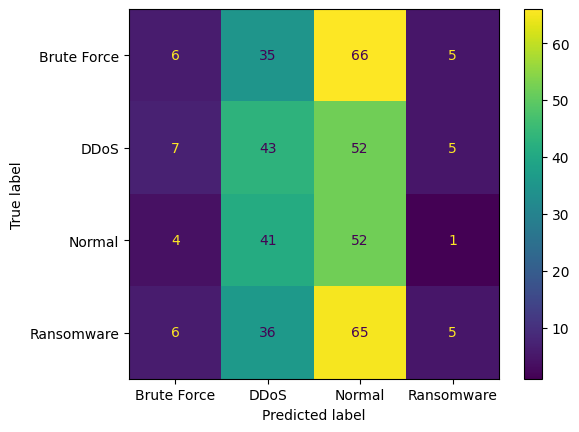

In [32]:
# -------------------------------
# Build the DNN model
# -------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.metrics import ConfusionMatrixDisplay
model = Sequential([
    Dense(128, activation = "relu", input_shape = (X_train.shape[1],)),
    Dense(128, activation = "relu"),
    Dense(len(np.unique(Y)), activation = 'softmax')
])

model.compile(optimizer= optimizers.SGD(0.05), loss = "sparse_categorical_crossentropy")

# -------------------------------
# Train the model
# -------------------------------
model.fit(X_train, Y_train, batch_size = 264)

# -------------------------------
# Predict
# -------------------------------
y_pred_DNN = model.predict(X_test).argmax(axis = 1)

# -------------------------------
# Compute metrics
# -------------------------------
cm = confusion_matrix(Y_test, y_pred_DNN)
accuracy = accuracy_score(Y_test, y_pred_DNN)
precision = precision_score(Y_test, y_pred_DNN, average = "macro")
recall = recall_score(Y_test, y_pred_DNN, average = "macro")

# -------------------------------
# Display Confusion Matrix
# -------------------------------
labels = sorted(label_encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = "viridis")

# -------------------------------
# Display Metrics
# -------------------------------
print("\nEvaluation Metrics:")
print("Confusion Matrix:\n", cm)
print(f"Accuracy Score:  {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score:    {recall:.4f}")